In [8]:
class Dog:
    def __init__(self, name, age):  # конструктор
        self.name = name
        self.age = age
    
    def bark(self):
        print(f'{self.name} говорит: Гав-гав!')

    def __del__(self):
        print(f'Объект {self.name} удален')

dog1 = Dog('Бобик', 3)
dog1.bark()
print(dog1.age)
del dog1

Бобик говорит: Гав-гав!
3
Объект Бобик удален


In [32]:
class Car:
    wheels = 4 # атрибут класса
    def __init__(self, brand, model, age):
        self.brand = brand
        self.model = model
        self.age = age

    def desc(self):
        print(f'Это {self.brand} {self.model} с {Car.wheels} колесами и ей {self.age} лет')

In [33]:
car1 = Car('Toyta', 'Corolla', 15)
car2 = Car('Lada', 'Largus', 10)

In [34]:
car1.desc()
car2.desc()
print()
Car.wheels = 5
car1.desc()
car2.desc()
print()
car1.age = 16
car1.desc()
car2.desc()

Это Toyta Corolla с 4 колесами и ей 15 лет
Это Lada Largus с 4 колесами и ей 10 лет

Это Toyta Corolla с 5 колесами и ей 15 лет
Это Lada Largus с 5 колесами и ей 10 лет

Это Toyta Corolla с 5 колесами и ей 16 лет
Это Lada Largus с 5 колесами и ей 10 лет


### Наследование

In [39]:
class Animal:
    def __init__(self, name):
        self.name = name
    def make_sound(self):
        print(f'{self.name} издает звук')

class Cat(Animal):
    def make_sound(self):
        super().make_sound()
        print(f'{self.name} говорит: Мяу!')

cat1 = Cat('Мурка')
cat1.make_sound()

Мурка издает звук
Мурка говорит: Мяу!


### Инкапсуляция

In [58]:
class Person:
    def __init__(self, name: str, age: int, sex: str):
        self.name = name
        self.__age = age  # приватный
        self._sex = sex  # защищен

    def get_age(self) -> int:
        return self.__age

    def set_age(self, new_age):
        if new_age > 0:
            self.__age = new_age
        else:
            print('Возраст должен быть положительным')

person = Person('Иван', 25, 'мужчина')
print(person.name)
print(person._sex)
print(person.get_age())
person.set_age(26)
print(person.get_age())
# print(person._Person__age)  # получение приватного метода

Иван
мужчина
25
26


### Полиморфизм

In [65]:
from abc import ABC, abstractmethod

class Animal(ABC):
    @abstractmethod  # сейчас
    def make_sound(self) -> str:
        pass
        # raise NotImplemented # раньше
class Dog(Animal):
    def make_sound(self) -> str:
        return 'Гав'

class Cat(Animal):
    def make_sound(self) -> str:
        return 'Мяу'

def animal_sound(animal: Animal):
    print(animal.make_sound())

dog = Dog()
cat = Cat()

animal_sound(dog)
animal_sound(cat)

Гав
Мяу


### Множественное

In [72]:
class A:
    def method(self):
        print('Method from A')

class B(A):
    def method(self):
        print('Method from B')

class C(A):
    def method(self):
        print('Method from C')

class D(B, C):
    pass

d = D()
d.method()  # D -> B -> C -> A
print(D.mro())

Method from B
[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]


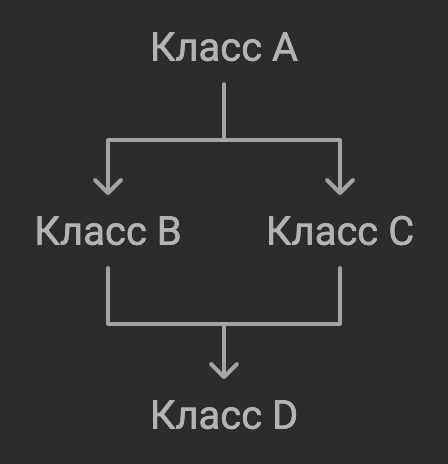

### Скорость и память

In [73]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [77]:
points = [Point(i, i) for i in range(10000000)]  # namedtuple из collections

In [ ]:
from abc import ABC, abstractmethod

class Animal(ABC):
    @abstractmethod
    def make_sound(self) -> str:
        """Этот метод должен быть реализован в дочернем классе"""
        pass

class Dog(Animal):
    def make_sound(self) -> str:
        return 'Гав'

class Cat(Animal):
    def make_sound(self) -> str:
        return 'Мяу'

def animal_sound(animal: Animal):
    print(animal.make_sound())

dog = Dog()
cat = Cat()

animal_sound(dog)
animal_sound(cat)

In [82]:
from dataclasses import dataclass, field

@dataclass
class Person:
    name: str
    age: int
    job: str

person1 = Person(name='Ivan', age=25, job='engeener')
person2 = Person(name='Alice', age=30, job='designer')
print(person1)
# __init__ __repr__ __eq__

Person(name='Ivan', age=25, job='engeener')


In [88]:
@dataclass
class Book:
    title: str
    genge: str = 'Fiction'
    reviews: list = field(default_factory=list)

book1 = Book('1984', 'Джордж Оурел')
book1.reviews.append('cool!!!')
book1.reviews.append('NICE')
book1

Book(title='1984', genge='Джордж Оурел', reviews=['cool!!!', 'NICE'])

| **Характеристика**       | **Абстрактные классы**                                | **Датаклассы**                                         |
|--------------------------|-------------------------------------------------------|--------------------------------------------------------|
| **Цель**                 | Задание интерфейсов и структуры для наследования       | Хранение данных и автоматическая генерация методов     |
| **Инстанцирование**      | Нельзя инстанцировать абстрактный класс                | Полноценные классы для создания объектов данных        |
| **Наследование**         | Используются как шаблоны для создания дочерних классов | Можно наследоваться, но это не основная их цель        |
| **Автоматические методы**| Не генерируются автоматически                         | Автоматически создаются методы `__init__`, `__repr__`, `__eq__` |
| **Гибкость**             | Высокая, поддерживает сложную логику и абстракции      | Преимущественно для простых классов с данными     

## ДЗ
1.
Создайте абстрактный класс `Shape`, который содержит метод `area()` для вычисления площади. Реализуйте два класса-наследника `Circle` и `Rectangle`, которые реализуют метод `area()`.

    Рассчитайте площадь круга и прямоугольника, используя созданные классы.

2.
Создайте датакласс `Employee`, который содержит поля `name`, `age`, `position`, и `salary`. Добавьте в класс метод для увеличения зарплаты на заданный процент.

    Создайте несколько объектов класса `Employee` и увеличьте зарплату каждому из них.

3.
    1. Создайте класс `Student`, который имеет атрибуты: имя, возраст и курс.
    2. Реализуйте метод `introduce`, который выводит информацию о студенте.
    3. Модифицируйте класс `Student`, чтобы атрибуты "возраст" и "курс" были приватными, и добавьте методы для безопасного изменения и получения этих данных.

In [89]:
class MathOperations:
    @staticmethod
    def add(a, b):
        return a + b

class Person:
    population = 0

    def __init__(self, name):
        self.name = name
        Person.population += 1

    @classmethod
    def create_anonumys(cls):
        return cls('anonumys')


In [92]:
class Person:
    population = 0

    def __init__(self, name, age):
        self.name = name
        self.__age = age
        Person.population += 1

    @property
    def age(self):
        return self.__age

person = Person('Ivan', 26)
person.age

26

| **Характеристика**        | **`@staticmethod`**                             | **`@classmethod`**                           | **`@property`**                           |
|---------------------------|-------------------------------------------------|----------------------------------------------|--------------------------------------------|
| **Привязка к**             | Не привязан ни к объекту, ни к классу           | Привязан к классу (первый аргумент `cls`)    | Привязан к объекту (первый аргумент `self`)|
| **Цель**                  | Для методов, которые не взаимодействуют с объектом или классом | Для методов, которые работают с классом или создают экземпляры | Для работы с атрибутами объектов через интерфейс геттеров и сеттеров |
| **Пример вызова**          | `ClassName.method()`                            | `ClassName.method()`                         | `object.attribute`                         |
| **Основное использование**| Вспомогательные функции, логически относящиеся к классу | Методы, работающие на уровне класса или создающие объекты | Геттеры и сеттеры для управления доступом к атрибутам объектов |